In [1]:
import os
x = os.getcwd()
print(x)
path = (os.path.join(x,'..','..','IR','Twitter.csv'))
print(path)

C:\Users\Prachi Bist
C:\Users\Prachi Bist\..\..\IR\Twitter.csv


In [2]:
import numpy as np

In [3]:
import pandas as pd
dataframe = pd.read_csv(path)
dataframe

,tweet_text,claim
0,RT @PirateAtLaw: No no no. Corona beer is the ...,1
1,@FernandoSVZLA @AP So far ~50 people outside C...,1
2,@realDonaldTrump A lot of people are saying co...,1
3,@realDonaldTrump I wanna see a post of yoursel...,0
4,Another case for more testing for #coronavirus...,1
...,...,...
9976,This outbreak started because the government o...,1
9977,#Coronavirus: @Naturemagazine apologises for r...,1
9978,Only Nindroids are immune to the pandemic. Pla...,1
9979,I’ve been reading how there’s no proof of immu...,1


In [4]:
# tweets = list(data['tweet_text'])
# tweets

In [5]:
!pip install spacy

In [6]:
import spacy

In [7]:
!pip install -U pip setuptools wheel

In [8]:
!pip install -U spacy

In [9]:
!python -m spacy download en_core_web_lg #pre-trained

     -------------------------------------- 400.7/400.7 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-lg
    Found existing installation: en-core-web-lg 3.2.0
    Uninstalling en-core-web-lg-3.2.0:
      Successfully uninstalled en-core-web-lg-3.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [10]:
nlp = spacy.load("en_core_web_lg")

DATA PREPROCESSING

In [11]:
tweets = dataframe
len(tweets)
tweets

,tweet_text,claim
0,RT @PirateAtLaw: No no no. Corona beer is the ...,1
1,@FernandoSVZLA @AP So far ~50 people outside C...,1
2,@realDonaldTrump A lot of people are saying co...,1
3,@realDonaldTrump I wanna see a post of yoursel...,0
4,Another case for more testing for #coronavirus...,1
...,...,...
9976,This outbreak started because the government o...,1
9977,#Coronavirus: @Naturemagazine apologises for r...,1
9978,Only Nindroids are immune to the pandemic. Pla...,1
9979,I’ve been reading how there’s no proof of immu...,1


In [12]:
tweets['tweet_text'] = dataframe.tweet_text.str.lower()

In [13]:
import regex as re

In [14]:
#removing URL
tweets.tweet_text =tweets.tweet_text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
tweets.tweet_text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

0       rt @pirateatlaw: no no no. corona beer is the ...
1       @fernandosvzla @ap so far ~50 people outside c...
2       @realdonaldtrump a lot of people are saying co...
3       @realdonaldtrump i wanna see a post of yoursel...
4       another case for more testing for #coronavirus...
                              ...                        
9976    this outbreak started because the government o...
9977    #coronavirus: @naturemagazine apologises for r...
9978    only nindroids are immune to the pandemic. pla...
9979    i’ve been reading how there’s no proof of immu...
9980    this is wonderful, more exploit for better cur...
Name: tweet_text, Length: 9981, dtype: object

In [15]:
#Placeholders Some text cleaning was already done on the dataset which replaced some links with {link} and all the videos with [video]. They don’t seem to be of any value when doing sentiment analysis so I will remove them with regex
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r'{link}', '', x))
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r"\[video\]", '', x))

In [16]:
#HTML reference characters I don’t think these are of any value to the analysis so they also should be removed
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [17]:
#removing punctuations
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

In [18]:
#Twitter handles Prior the text pre-processing stage, I changed all the twitter handles to @mention in acknowledgement of the need for protecting people’s privacy
tweets.tweet_text = tweets.tweet_text.apply(lambda x: re.sub(r'@mention', '', x))

In [19]:
#Tokenize the text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tweets['tokens'] = tweets['tweet_text'].apply(tknzr.tokenize)

In [20]:
tweets['tokens'][8]

['stormisuponus',
 'summery',
 'of',
 'investigation',
 'the',
 'chinese',
 'stole',
 'a',
 'strain',
 'of',
 'the',
 'corona',
 'virus',
 'from',
 'a',
 'canadian',
 'lab',
 'weaponized',
 'it',
 'in',
 'wohan',
 'china',
 'as',
 'a',
 'bioweapon',
 'must',
 'read',
 'the',
 'article',
 'and',
 'attached',
 'links',
 'decide',
 'for',
 'yourself']

In [21]:
import re 
combined = []
for tweet in tweets['tokens']: 
    combined.append(" ".join(tweet))
for i in range(len(combined)):
    combined[i] = re.sub(r'[^\w\s]','',combined[i]) #using regex module re to remove punctuation from the text
    combined[i] = re.sub(r'[0-9]+','',combined[i]) #using regex module re to remove digits from the text

In [22]:
combined[:5]

['rt pirateatlaw  no no no corona beer is the cure not the disease',
 'fernandosvzla ap so far people outside china have it with no deaths if china was hiding information and it was more lethal we would see that fairly quickly viruses always mutate the easiest is to evade the immune system the hardest is to develop new abilities',
 'realdonaldtrump a lot of people are saying cocaine cures covid  so',
 'realdonaldtrump i wanna see a post of yourself drinking this up and see if it helps cure the virus or any other tremendous bad bacteria test this put instead of the media covid foh w  the nonsense and disruptive lies coming out of your mouth jesus man get out already',
 'another case for more testing for coronavirus blood tests show of people are now immune to covid  in one town in germany']

In [23]:
combined_nlp = [] 
for tweet in combined:
    combined_nlp.append(nlp(tweet))

In [24]:
combined_nlp[:5]

[rt pirateatlaw  no no no corona beer is the cure not the disease,
 fernandosvzla ap so far people outside china have it with no deaths if china was hiding information and it was more lethal we would see that fairly quickly viruses always mutate the easiest is to evade the immune system the hardest is to develop new abilities,
 realdonaldtrump a lot of people are saying cocaine cures covid  so,
 realdonaldtrump i wanna see a post of yourself drinking this up and see if it helps cure the virus or any other tremendous bad bacteria test this put instead of the media covid foh w  the nonsense and disruptive lies coming out of your mouth jesus man get out already,
 another case for more testing for coronavirus blood tests show of people are now immune to covid  in one town in germany]

In [25]:
named_entity_lists = [] 
for tweet in combined_nlp:
    named_entity_lists.append(list(set([entity.label_ for entity in tweet.ents])))

In [26]:
named_entity_lists[:10]

[['ORG'],
 ['GPE'],
 [],
 ['PERSON'],
 ['CARDINAL', 'GPE'],
 ['ORG', 'GPE'],
 [],
 [],
 ['GPE', 'NORP'],
 ['ORG']]

In [27]:
word2vec_lists=[]
for tweet in combined_nlp:
    temp_list = []
    for token in tweet:
        temp_list.append(token.vector)
    word2vec_lists.append(np.mean(temp_list, axis=0))

In [28]:
len(word2vec_lists)

9981

In [29]:
import spacy

nlp = spacy.load("en_core_web_sm")
ner_lst = nlp.pipe_labels['ner']

print(len(ner_lst))
print(ner_lst)

C:\Users\Prachi Bist\Anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


18
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [30]:
import numpy as np
named_entity_lists=[]
for tweet in combined_nlp:
    named_entity_lists.append([token.pos_ for token in tweet])
len(named_entity_lists)
nep_code_set = set()
for named_entity_list in named_entity_lists:
    for entity in named_entity_list:
        nep_code_set.add(entity)
nep_code_list = list(nep_code_set)
nep_codes = {} 
for i , code in enumerate(nep_code_list):
    nep_codes[code] = i

nep_encoded_vectors=[]
for named_entity_list in named_entity_lists:
    temp_vec = np.zeros([len(nep_code_set)])
    for entity in named_entity_list:
        temp_vec[nep_codes[entity]]+=1
    nep_encoded_vectors.append(temp_vec)

In [31]:
len(nep_encoded_vectors)

9981

In [32]:
pos_tag_lists = []
for tweet in combined_nlp:
    pos_tag_lists.append([token.pos_ for token in tweet])

pos_tag_code_set = set()
for pos_tag_list in pos_tag_lists:
    for tag in pos_tag_list:
        pos_tag_code_set.add(tag)
pos_tag_code_list = list(pos_tag_code_set)


pos_tag_codes = {} 
for i , code in enumerate(pos_tag_code_list):
    pos_tag_codes[code] = i


pos_encoded_vectors = []
for lst in pos_tag_lists:
    temp_vector = np.zeros([len(pos_tag_code_list)])
    for tag in lst:
        temp_vector[pos_tag_codes[tag]] += 1
    pos_encoded_vectors.append(temp_vector)
pos_encoded_vectors 

[array([0., 1., 0., 2., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 3., 0.,
        4.]),
 array([1., 0., 0., 4., 3., 2., 0., 0., 0., 6., 2., 2., 5., 6., 5., 4., 0.,
        6.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 3., 1., 1., 0.,
        4.]),
 array([3., 0., 0., 5., 5., 0., 0., 1., 0., 2., 6., 1., 4., 9., 0., 6., 0.,
        9.]),
 array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 6., 0., 2., 1., 1., 1., 0.,
        8.]),
 array([2., 0., 0., 3., 1., 0., 0., 0., 0., 3., 1., 0., 0., 3., 1., 1., 0.,
        1.]),
 array([0., 0., 0., 2., 4., 0., 0., 0., 0., 2., 2., 1., 1., 3., 1., 2., 0.,
        3.]),
 array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 1., 1., 1., 2., 0.,
        6.]),
 array([1., 0., 0., 3., 2., 0., 0., 0., 0., 1., 6., 0., 2., 4., 1., 6., 0.,
        9.]),
 array([2., 0., 1., 6., 4., 0., 0., 3., 0., 0., 3., 0., 3., 6., 1., 3., 0.,
        9.]),
 array([0., 0., 0., 4., 2., 0., 0., 1., 0., 0., 2., 1., 1., 2., 2., 2., 0.,
        2.]),
 array([ 0

In [33]:
pos_tag_lists[:10]

[['PROPN',
  'PROPN',
  'SPACE',
  'PRON',
  'INTJ',
  'DET',
  'NOUN',
  'NOUN',
  'AUX',
  'DET',
  'NOUN',
  'PART',
  'DET',
  'NOUN'],
 ['PROPN',
  'PROPN',
  'ADV',
  'ADV',
  'NOUN',
  'ADP',
  'PROPN',
  'VERB',
  'PRON',
  'ADP',
  'DET',
  'NOUN',
  'SCONJ',
  'PROPN',
  'AUX',
  'VERB',
  'NOUN',
  'CCONJ',
  'PRON',
  'AUX',
  'ADV',
  'ADJ',
  'PRON',
  'AUX',
  'VERB',
  'SCONJ',
  'ADV',
  'ADV',
  'NOUN',
  'ADV',
  'VERB',
  'DET',
  'ADJ',
  'AUX',
  'PART',
  'VERB',
  'DET',
  'ADJ',
  'NOUN',
  'DET',
  'ADJ',
  'AUX',
  'PART',
  'VERB',
  'ADJ',
  'NOUN'],
 ['VERB',
  'DET',
  'NOUN',
  'ADP',
  'NOUN',
  'AUX',
  'VERB',
  'NOUN',
  'NOUN',
  'VERB',
  'SPACE',
  'ADV'],
 ['NOUN',
  'PRON',
  'VERB',
  'VERB',
  'DET',
  'NOUN',
  'ADP',
  'PRON',
  'VERB',
  'PRON',
  'ADP',
  'CCONJ',
  'VERB',
  'SCONJ',
  'PRON',
  'VERB',
  'VERB',
  'DET',
  'NOUN',
  'CCONJ',
  'DET',
  'ADJ',
  'ADJ',
  'ADJ',
  'NOUN',
  'NOUN',
  'DET',
  'VERB',
  'ADV',
  'ADP',
  'D

In [34]:
dep_lists = [] 
for tweet in combined_nlp:
    dep_lists.append([token.dep_ for token in tweet])
dep_code_set = set()
for dep_list in dep_lists:
    for dep in dep_list:
        dep_code_set.add(dep)
dep_code_list = list(dep_code_set)

dep_codes = {} 
for i , code in enumerate(dep_code_list):
    dep_codes[code] = i
dep_encoded_vectors = []
for lst in dep_lists:
    temp_vector = np.zeros([len(dep_code_list)])
    for tag in lst:
        temp_vector[dep_codes[tag]] += 1
    dep_encoded_vectors.append(temp_vector)
dep_encoded_vectors 

[array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 2., 1., 0., 0., 0., 0., 1., 0., 0., 3.]),
 array([0., 3., 0., 0., 0., 0., 2., 2., 6., 0., 0., 0., 0., 6., 0., 0., 0.,
        0., 0., 0., 2., 1., 4., 0., 0., 1., 0., 2., 0., 0., 0., 1., 1., 0.,
        5., 4., 1., 0., 0., 1., 0., 0., 0., 0., 4.]),
 array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.]),
 array([1., 4., 0., 0., 0., 2., 4., 3., 2., 0., 0., 0., 0., 3., 0., 1., 0.,
        0., 0., 0., 2., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 3., 0., 1.,
        4., 3., 3., 0., 2., 2., 0., 1., 0., 0., 6.]),
 array([1., 1., 0., 0., 0., 0., 6., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 6., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 3., 0., 

In [35]:
original_feature_set = np.hstack((word2vec_lists,dep_encoded_vectors,pos_encoded_vectors,nep_encoded_vectors))

In [36]:
original_feature_set.shape

(9981, 381)

In [37]:
from sklearn.decomposition import PCA
Covariance_matrix = PCA(n_components=original_feature_set.shape[1])
Covariance_matrix.fit(original_feature_set)

PCA(n_components=381)

In [38]:
Covariance_matrix

PCA(n_components=381)

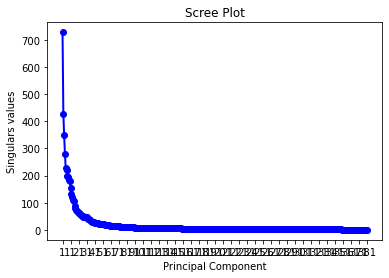

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(Covariance_matrix.n_components_) + 1
plt.plot(PC_values, Covariance_matrix.singular_values_, 'o-', linewidth=2, color='blue')
plt.xticks(np.arange(min(PC_values), max(PC_values)+1, 10.0))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singulars values')
# matplotlib.axes.Axes.set_xscale(1, 'linear')
plt.show()

Text(0, 0.5, 'Variance Explained')

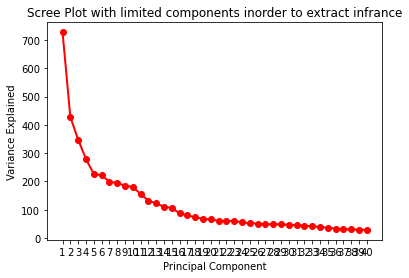

In [40]:
pc_values_limited = PC_values[:40]
varicace_ratio_limited = Covariance_matrix.singular_values_[:40]
plt.plot(pc_values_limited, varicace_ratio_limited, 'o-', linewidth=2, color='red')
plt.xticks(np.arange(min(PC_values), max(pc_values_limited)+1, 1))
plt.title('Scree Plot with limited components inorder to extract infrance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [41]:
new_feature_set = PCA(n_components=5)
new_feature_set = new_feature_set.fit(original_feature_set).transform(original_feature_set)

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = new_feature_set,dataframe['claim'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
dataframe['claim'].value_counts() #data is imbalanced

1    8722
0    1259
Name: claim, dtype: int64

In [45]:
pip install shutup

C:\Users\Prachi Bist\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


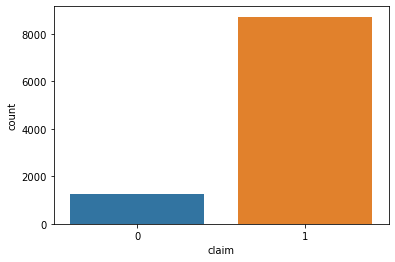

In [46]:
import seaborn as sns
sns.countplot(dataframe['claim'])
plt.show()
import shutup;
shutup.please()

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [48]:
support_vec = SVC(max_iter=15000,probability = True)
kf = KFold(n_splits=5, shuffle = True)

def train(X,y,reg,kf):
    if kf == False: 
        reg.fit(X,y)
    else:
        max_score = 0
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            reg.fit(X_train,y_train)
            print(f'evaluate score: {reg.score(X_test,y_test)}')
    return reg,X_test,y_test

In [49]:
support_vec_trained_model,X_test,y_test = train(X,y,support_vec,kf)

evaluate score: 0.8763144717075614
evaluate score: 0.8732464929859719
evaluate score: 0.8797595190380761
evaluate score: 0.8712424849699398
evaluate score: 0.8687374749498998


In [50]:
predicted_values = support_vec_trained_model.predict(X_test)

In [51]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predicted_values, average='macro')[2]

0.46487935656836465

In [52]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, predicted_values)

0.8687374749498998